In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [11]:
class AgentState(TypedDict):
    word: str
    num: int
    final: str

In [12]:
def vehicle(state: AgentState) -> AgentState:
    """This node adds the vehicle brand"""
    state["final"] = f"Brand: Toyota. "
    return state

def model(state: AgentState) -> AgentState:
    """This node selects the vehicle model"""
    state["final"] = state["final"] + f"Model: RAV-4."
    return state

def engine_type(state: AgentState) -> AgentState:
    """This node selects the engine type"""
    state["final"] = state["final"] + f"Engine: Electric. "
    return state

def manufacturing_origin(state: AgentState) -> AgentState:
    """This node selects the manufacturing country"""
    state["final"] = state["final"] + f"Manufacturing Country: UK. "
    return state

def simulation_configuration(state: AgentState) -> AgentState:
    """This node configures the supply chain simulation"""
    state["final"] = state["final"] + f"Simulation Parameters: XY... "
    return state

def export_results(state: AgentState) -> AgentState:
    """This node is for exporting the results from the simulation to Power BI"""
    state["final"] = state["final"] + f"Exporting to .csv and Power BI. "

In [13]:
graph = StateGraph(AgentState)

graph.add_node("vehicle_node", vehicle)
graph.add_node("model_node", model)
graph.add_node("engine_node", engine_type)
graph.add_node("manufacturing_origin", manufacturing_origin)
graph.add_node("simulation_configuration", simulation_configuration)
graph.add_node("export_results", export_results)

graph.add_edge(START, "vehicle_node")
graph.add_edge("vehicle_node", "model_node")
graph.add_edge("model_node", "engine_node")
graph.add_edge("engine_node", "manufacturing_origin")
graph.add_edge("manufacturing_origin", "simulation_configuration")
graph.add_edge("simulation_configuration", "export_results")
graph.add_edge("export_results", END)

app = graph.compile()

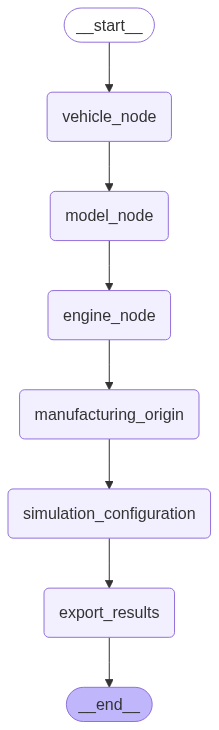

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))